課題：3×3マスの迷路探索の実装

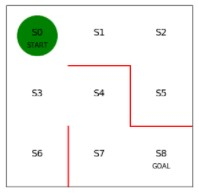


*   コードの説明（#の箇所）


## 1．迷路内をランダムに探索

In [13]:
# 使用するパッケージの宣言
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


迷路の実装

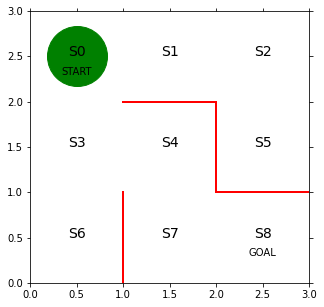

In [14]:
# 初期位置での迷路の様子

# 図を描く大きさと、図の変数名を宣言
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 赤い壁を描く（残りの赤線を描くコードを追加する）
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)


# 状態を示す文字S0～S8を描く（残りのS1～S7を描くコードを追加する）
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')

plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 描画範囲の設定と目盛りを消す設定
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off',)

# 現在地S0に緑丸を描画する
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)


エージェントの実装

In [15]:
# 初期の方策を決定するパラメータtheta_0を設定

# 行は状態0～7、列は移動方向で↑、→、↓、←を表す　(S1～S7までのコードを追加)
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],  # s7、※s8はゴールなので、方策はなし
                    ])


In [16]:
# 方策パラメータtheta_0をランダム方策piに変換する関数の定義
def simple_convert_into_pi_from_theta(theta):
    '''単純に割合を計算する'''

    [m, n] = theta.shape  # thetaの行列サイズを取得
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])  # 割合の計算

    pi = np.nan_to_num(pi)  # nanを0に変換

    return pi

# ランダム行動方策pi_0を求める
pi_0 = simple_convert_into_pi_from_theta(theta_0)

In [17]:
# 初期の方策pi_0を表示
pi_0

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ]])

In [19]:
# 1step移動後の状態sを求める関数を定義


def get_next_s(pi, s):
    direction = ["up", "right", "down", "left"]

    next_direction = np.random.choice(direction, p=pi[s, :])
    # pi[s,:]の確率に従って、directionが選択される

    if next_direction == "up":
        s_next = s - 3  # 上に移動するときは状態の数字が3小さくなる
    elif next_direction == "right":
        s_next = s + 1  # 右に移動するときは状態の数字が1大きくなる
    elif next_direction == "down":
        s_next = s + 3  # 下に移動するときは状態の数字が3大きくなる
    elif next_direction == "left":
        s_next = s - 1  # 左に移動するときは状態の数字が1小さくなる

    return s_next


In [20]:
# 


def goal_maze(pi):
    s = 0  # スタート地点
    state_history = [0]  # 

    while (1):  # ゴールするまでループ
        next_s = get_next_s(pi, s)
        state_history.append(next_s)  # 

        if next_s == 8:  # 
            break
        else:
            s = next_s

    return state_history


In [21]:
# 迷路内をゴールを目指して、移動
state_history = goal_maze(pi_0)

print(state_history)
print("迷路を解くのにかかったステップ数は" + str(len(state_history) - 1) + "です")


[0, 3, 6, 3, 0, 3, 0, 3, 4, 7, 8]
迷路を解くのにかかったステップ数は10です


In [22]:
# エージェントの移動の様子を可視化
# 参考URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML


def init():
    '''背景画像の初期化'''
    line.set_data([], [])
    return (line,)


def animate(i):
    '''フレームごとの描画内容'''
    state = state_history[i]  
    x = (state % 3) + 0.5  
    y = 2.5 - int(state / 3)
    line.set_data(x, y)
    return (line,)


#　初期化関数とフレームごとの描画関数を用いて動画を作成する
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    state_history), interval=200, repeat=False)

HTML(anim.to_jshtml())


## 2．Q学習で迷路を攻略

In [ ]:
# 初期の方策を決定するパラメータtheta_0を設定

# 行は状態0～7、列は移動方向で↑、→、↓、←を表す　(S1～S7までのコードを追加)
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],  # s7、※s8はゴールなので、方策はなし
                    ])


In [48]:
# 初期の行動価値関数Qを設定

[a, b] = theta_0.shape  # 行と列の数をa, bに格納
Q = np.random.rand(a, b) * theta_0 * 0.1
# *theta0をすることで要素ごとに掛け算をし、Qの壁方向の値がnanになる
Q

array([[       nan, 0.01552006, 0.01981637,        nan],
       [       nan, 0.06240327,        nan, 0.08865943],
       [       nan,        nan, 0.04210506, 0.02690683],
       [0.0228626 , 0.0973036 , 0.05445683,        nan],
       [       nan,        nan, 0.0799788 , 0.07370999],
       [0.08927232,        nan,        nan,        nan],
       [0.03119754,        nan,        nan,        nan],
       [0.03319336, 0.01956957,        nan,        nan]])

In [49]:
np.random.rand(a, b)

array([[0.4677261 , 0.37275101, 0.56342283, 0.73321954],
       [0.4798828 , 0.09756614, 0.03092068, 0.72317828],
       [0.98620981, 0.63729764, 0.10386571, 0.85132099],
       [0.27106047, 0.88358171, 0.0992739 , 0.61997014],
       [0.85854236, 0.94832542, 0.44630572, 0.46627825],
       [0.70180152, 0.39597482, 0.82303996, 0.25591992],
       [0.31020901, 0.05313451, 0.35124739, 0.18089315],
       [0.62390919, 0.1885467 , 0.55463158, 0.37303921]])

In [51]:
np.nanargmax(Q[0, :])

2

In [47]:
# ε-greedy法を実装（ε-greedy法についても解説） ε=1

#

def get_action(s, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]

    # 行動を決める
    if np.random.rand() < epsilon:
        # εの確率でランダムに動く
        next_direction = np.random.choice(direction, p=pi_0[s, :])
    else:
        # Qの最大値の行動を採用する
        next_direction = direction[np.nanargmax(Q[s, :])]

    # 行動をindexに
    if next_direction == "up":
        action = 0
    elif next_direction == "right":
        action = 1
    elif next_direction == "down":
        action = 2
    elif next_direction == "left":
        action = 3

    return action


def get_s_next(s, a, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]
    next_direction = direction[a]  # 

    # 行動から次の状態を決める 
    if next_direction == "up":
        s_next = s - 3  
    elif next_direction == "right":
        s_next = s + 1  
    elif next_direction == "down":
        s_next = s + 3  
    elif next_direction == "left":
        s_next = s - 1  

    return s_next


In [40]:
np.random.rand()

0.4054543186608006

In [41]:
# Q学習による行動価値関数Qの更新


def Q_learning(s, a, r, s_next, Q, eta, gamma):
# 状態が8なら、Qの更新が小さい
    if s_next == 8:
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
# 状態が8じゃないなら、Qの更新が大きい
    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * np.nanmax(Q[s_next,: ]) - Q[s, a])

    return Q

In [71]:
# 初期の行動価値関数Qを設定

[a, b] = theta_0.shape  # 行と列の数をa, bに格納
Q = np.random.rand(a, b) * theta_0 * 0.1
# *theta0をすることで要素ごとに掛け算をし、Qの壁方向の値がnanになる
Q

array([[       nan, 0.01183358, 0.04025632,        nan],
       [       nan, 0.04847249,        nan, 0.09775516],
       [       nan,        nan, 0.0711253 , 0.07150292],
       [0.0060637 , 0.06456016, 0.07793105,        nan],
       [       nan,        nan, 0.05505144, 0.03321586],
       [0.00964897,        nan,        nan,        nan],
       [0.00584112,        nan,        nan,        nan],
       [0.07834901, 0.085768  ,        nan,        nan]])

In [97]:
eta=0.1
gamma=0.9
epsilon=1
s=2
r=1
a=2
s_next = 1
eta * (r - Q[s, a]) < eta * (r + gamma * np.nanmax(Q[s_next,: ]) - Q[s, a])

True

In [98]:
eta * (r - Q[s, a])

0.09527998537378733

In [99]:
eta * (r + gamma * np.nanmax(Q[s_next,: ]) - Q[s, a])

0.10213028086971823

In [84]:
s = 0  # 
a = a_next = get_action(s, Q, epsilon, pi_0)  # 行動aの方向
s_a_history = [[0, np.nan]]  

a = a_next
s_a_history[-1][1] = a
s_a_history

[[0, 2]]

In [85]:
s_next = get_s_next(s, a, Q, epsilon, pi_0)
# 

s_a_history.append([s_next, np.nan])
s_a_history

[[0, 2], [3, nan]]

In [83]:
s_a_history = [[0, np.nan]]
s_a_history[-1][1]

nan

In [42]:
# Q学習で迷路を解く関数の定義、状態と行動の履歴および更新したQを出力 


def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0  # 
    a = a_next = get_action(s, Q, epsilon, pi)  # 行動aの方向
    s_a_history = [[0, np.nan]]  

    while (1):  #
        a = a_next  # 

        s_a_history[-1][1] = a
        # 

        s_next = get_s_next(s, a, Q, epsilon, pi)
        # 

        s_a_history.append([s_next, np.nan])
        # 

        # 
        if s_next == 8:
            r = 1  # 
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)
            # 

        # 
        Q = Q_learning(s, a, r, s_next, Q, eta, gamma)

        # 
        if s_next == 8:  # 
            break
        else:
            s = s_next

    return [s_a_history, Q]


In [95]:
a, b = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)
a

[[0, 2],
 [3, 1],
 [4, 3],
 [3, 0],
 [0, 1],
 [1, 1],
 [2, 3],
 [1, 3],
 [0, 2],
 [3, 0],
 [0, 1],
 [1, 1],
 [2, 3],
 [1, 1],
 [2, 3],
 [1, 1],
 [2, 3],
 [1, 3],
 [0, 1],
 [1, 1],
 [2, 2],
 [5, 0],
 [2, 2],
 [5, 0],
 [2, 3],
 [1, 3],
 [0, 1],
 [1, 1],
 [2, 3],
 [1, 3],
 [0, 1],
 [1, 1],
 [2, 3],
 [1, 3],
 [0, 1],
 [1, 1],
 [2, 2],
 [5, 0],
 [2, 3],
 [1, 1],
 [2, 3],
 [1, 1],
 [2, 3],
 [1, 1],
 [2, 2],
 [5, 0],
 [2, 2],
 [5, 0],
 [2, 3],
 [1, 1],
 [2, 3],
 [1, 1],
 [2, 2],
 [5, 0],
 [2, 2],
 [5, 0],
 [2, 2],
 [5, 0],
 [2, 2],
 [5, 0],
 [2, 2],
 [5, 0],
 [2, 3],
 [1, 1],
 [2, 2],
 [5, 0],
 [2, 3],
 [1, 1],
 [2, 2],
 [5, 0],
 [2, 2],
 [5, 0],
 [2, 3],
 [1, 3],
 [0, 2],
 [3, 0],
 [0, 1],
 [1, 3],
 [0, 2],
 [3, 1],
 [4, 3],
 [3, 0],
 [0, 2],
 [3, 1],
 [4, 2],
 [7, 1],
 [8, nan]]

In [91]:
b

array([[       nan, 0.01944818, 0.0504623 ,        nan],
       [       nan, 0.0500605 ,        nan, 0.09160271],
       [       nan,        nan, 0.0711253 , 0.07315059],
       [0.01298412, 0.06168462, 0.05964307,        nan],
       [       nan,        nan, 0.08408996, 0.03545537],
       [0.00964897,        nan,        nan,        nan],
       [0.02032091,        nan,        nan,        nan],
       [0.07834901, 0.33352487,        nan,        nan]])

In [43]:
# Q学習で迷路を解く

eta = 0.1  # 学習率
gamma = 0.9  # 時間割引率
epsilon = 0.5  # ε-greedy法の初期値
v = np.nanmax(Q, axis=1)  # 状態ごとに価値の最大値を求める
is_continue = True
episode = 1

V = []  # 
V.append(np.nanmax(Q, axis=1))  # 

while is_continue:  # 
    print("エピソード:" + str(episode))

    # ε-greedyの値を少しずつ小さくする
    epsilon = epsilon / 2

    # 
    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)

    # 状態価値の変化
    new_v = np.nanmax(Q, axis=1)  # 
    print(np.sum(np.abs(new_v - v)))
    v = new_v
    V.append(v)  #

    print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")

    # 100エピソード繰り返す
    episode = episode + 1
    if episode > 100:
        break


エピソード:1
1.0161176651730783
迷路を解くのにかかったステップ数は174です
エピソード:2
0.4563348934161005
迷路を解くのにかかったステップ数は48です
エピソード:3
0.1800977822466706
迷路を解くのにかかったステップ数は28です
エピソード:4
0.10364957619198584
迷路を解くのにかかったステップ数は32です
エピソード:5
0.08868059782722648
迷路を解くのにかかったステップ数は8です
エピソード:6
0.09773801231994123
迷路を解くのにかかったステップ数は10です
エピソード:7
0.09216748219484289
迷路を解くのにかかったステップ数は10です
エピソード:8
0.08712895586061525
迷路を解くのにかかったステップ数は10です
エピソード:9
0.08462234100444649
迷路を解くのにかかったステップ数は10です
エピソード:10
0.0720010178366558
迷路を解くのにかかったステップ数は8です
エピソード:11
0.08149720968408558
迷路を解くのにかかったステップ数は10です
エピソード:12
0.057851754521791365
迷路を解くのにかかったステップ数は6です
エピソード:13
0.06655912643842055
迷路を解くのにかかったステップ数は8です
エピソード:14
0.053765514424172434
迷路を解くのにかかったステップ数は6です
エピソード:15
0.04771077532005541
迷路を解くのにかかったステップ数は6です
エピソード:16
0.03898760420386527
迷路を解くのにかかったステップ数は4です
エピソード:17
0.03809438797390352
迷路を解くのにかかったステップ数は4です
エピソード:18
0.036973992682971635
迷路を解くのにかかったステップ数は4です
エピソード:19
0.035670810778871076
迷路を解くのにかかったステップ数は4です
エピソード:20
0.03422478257844086
迷路を解くのにかかったステップ数は4です

In [101]:
eta = 0.1  # 学習率
gamma = 0.9  # 時間割引率
epsilon = 0.5  # ε-greedy法の初期値
v = np.nanmax(Q, axis=1)  # 状態ごとに価値の最大値を求める
is_continue = True
episode = 1

V = []  # 
V.append(np.nanmax(Q, axis=1))  # 
V

[array([0.10881612, 0.07611439, 0.06245259, 0.15954777, 0.24384763,
        0.05423543, 0.09263123, 0.51413963])]

In [105]:
v = np.nanmax(Q, axis=1)
v

array([0.10881612, 0.07611439, 0.06245259, 0.15954777, 0.24384763,
       0.05423543, 0.09263123, 0.51413963])

In [44]:
# エージェントの移動の様子を可視化
# 参考URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML

def init():
    '''背景画像の初期化'''
    line.set_data([], [])
    return (line,)

def animate(i):
    '''フレームごとの描画内容'''
    state = s_a_history[i][0]  # 現在の場所を描く
    x = (state % 3) + 0.5  # 状態のx座標は、3で割った余り+0.5
    y = 2.5 - int(state / 3)  # y座標は3で割った商を2.5から引く
    line.set_data(x, y)
    return (line,)

#　初期化関数とフレームごとの描画関数を用いて動画を作成する
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())

In [45]:
# 状態価値の変化を可視化します
import matplotlib.cm as cm  # color map


def init2():
    # 背景画像の初期化
    line.set_data([], [])
    return (line,)


def animate2(i):
    # フレームごとの描画内容
    # 各マスに状態価値の大きさに基づく色付きの四角を描画
    line, = ax.plot([0.5], [2.5], marker="s",
                    color=cm.jet(V[i][0]), markersize=85)  # S0
    line, = ax.plot([1.5], [2.5], marker="s",
                    color=cm.jet(V[i][1]), markersize=85)  # S1
    line, = ax.plot([2.5], [2.5], marker="s",
                    color=cm.jet(V[i][2]), markersize=85)  # S2
    line, = ax.plot([0.5], [1.5], marker="s",
                    color=cm.jet(V[i][3]), markersize=85)  # S3
    line, = ax.plot([1.5], [1.5], marker="s",
                    color=cm.jet(V[i][4]), markersize=85)  # S4
    line, = ax.plot([2.5], [1.5], marker="s",
                    color=cm.jet(V[i][5]), markersize=85)  # S5
    line, = ax.plot([0.5], [0.5], marker="s",
                    color=cm.jet(V[i][6]), markersize=85)  # S6
    line, = ax.plot([1.5], [0.5], marker="s",
                    color=cm.jet(V[i][7]), markersize=85)  # S7
    line, = ax.plot([2.5], [0.5], marker="s",
                    color=cm.jet(1.0), markersize=85)  # S8
    return (line,)


#　初期化関数とフレームごとの描画関数を用いて動画を作成
anim2 = animation.FuncAnimation(
    fig, animate2, init_func=init2, frames=len(V), interval=200, repeat=False)

HTML(anim2.to_jshtml())
